<a href="https://colab.research.google.com/github/HKyeol/Python_study/blob/master/201224LRU%EC%9E%90%EC%B9%B4%EB%93%9C%EC%9C%A0%EC%82%AC%EB%8F%84collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LRU 알고리즘
```
out   메모리     in
    ㅁㅁㅁㅁㅁ <- a
    ㅁㅁㅁㅁ a <- b c
    ㅁㅁ a b c <- d b e f
a <- c d b e f            # b는 갱신
```
LRU 알고리즘이란 Oracle DATABASE의 메모리 관리를 효율적으로 하기 위해 고안된 대표적인 알고리즘으로 최신 데이터를 메모리에 유지시키고 오래된 데이터는 메모리에서 내보내게 하는 알고리즘

메모리에서 데이터를 조회하는 것(1초) --> cache hit
메모리에 없어서 디스크에서 조회하는 것(5초) --> cache miss

한번 디스크에서 읽은 데이터를 메모리에 올려놓고 메모리에서 빠르게 데이터를 조회할 수 있도록 LRU 알고리즘을 구현해서 만든 소프트웨어 입니다. 그런데 이 메모리 공간이 한정된 공간이다 보니 무한히 데이터를 올릴 수 없어서 오래된 데이터는 메모리에서 빠져나가게 되고 최신 데이터가 그 빠져나간 자리에 올라가게 됩니다.
최근에 내가 검색한 데이터는 다시 검색할 확률이 높은 데이터 이므로 메모리에 오래 두도록 하고 예전에 검색한 데이터는 메모리에서 빠져나가게 합니다.

# 알고리즘 문제를 해결하는 순서

1. 문제를 정확하게 이해를 해야한다.(문제를 2번은 반복해서 정독을 해서 이해를 해야함)  
2. 해결방법을 노트(메모장)에 번호순서대로 글로 적습니다.
3. 번호 순서대로 글로 적은 내용을 코딩으로 번역하면 됩니다. (한글 ---> 파이썬)

큰 문제를 작은 문제들로 쪼개서 작은 문제들을 하나씩 해결해가면서 큰 문제를 해결하는 방법으로 코딩을 해야합니다.  

파이썬 문법을 150개 학습 --> 파이썬 문법을 활용하는 알고리즘 문제 (함수를 만들어라~)  

* LRU 알고리즘 문제를 파이썬으로 구현하는 순서  

1. 문제를 2번 정독한다.
    1. LRU 알고리즘에 대한 이해가 있어야 합니다.
    2. 함수를 생성해야 하는데 입력값이 2개입니다. (도시이름, 캐쉬사이즈)
    3. 함수의 출력값은 총 실행시간(초) 입니다.
2. 번호 순서대로 해결 방법을 기술한다.
    1. 메모리(cache)를 만들어야 한다.(입력숫자만큼 cache 사이즈가 구성)
    2. 메모리에 데이터를 올린다(cache miss니까 5초가 걸려야 한다.)
    3. 메모리에서 데이터를 찾으면 cache hit니까 1초가 걸려야 한다.
3. 번호 순서대로 기술한 한글로 적은 해결방법을 파이썬으로 번역한다.

MRU는 가장 최근에 사용한거  
LRU는 거의 최근에 사용한거  
out  LRU <-------- MRU  in  
메모리에 있으면 거의 바로 엑세스 가능  
처음 올릴때는 MRU쪽에 올리고 점점 LRU로 감

하고자 하는게 무엇인지 질문을 명확하게 한다.  
질문: print(cacheProcess(도시이름, 캐시사이즈))  
결과: 수행시간  
```
cities = ['Jeju', 'Pangyo', 'New York','new york']
print(cacheSize(cities,4))
결과:16
```

2.1 도시이름은 대소문자를 구분하지 않게 만든다.  
2.2 메모리(cache)를 만들어야 한다.(입력 숫자만큼 cache 사이즈가 구성)  
2.3 메모리에 데이터를 올린다(cache miss니까 5초가 걸린다.)  
2.4 메모리에서 데이터를 찾으면 cache hit니까 1초가 걸린다.)

In [34]:
# 2.1 도시이름을 모두 소문자로 만들자
cities = ['Jeju', 'Pangyo', 'New York','new york']
for i in range(len(cities)):
    cities[i] = cities[i].lower()
print(cities)

['jeju', 'pangyo', 'new york', 'new york']

In [35]:
# 혹은
cities = ['Jeju', 'Pangyo', 'New York','new york']
city = []
for i in cities:
    city.append(i.lower())
city

['jeju', 'pangyo', 'new york', 'new york']

위의 코드를 comprehension을 사용해서 간단하게 수행하시오.

In [50]:
# 정답
cities = ['Jeju', 'Pangyo', 'New York','new york']
cities = [i.lower() for i in cities]

설명: 위의 코드는 comprehension 코드로 위의 5줄 코드를 2줄로 간소화한 코드입니다.  

문법: 
```
[출력 표현식 for 요소 in 입력시퀀스 if 조건식]
```
예:

In [49]:
a = [i for i in range(1,21) if i%2 == 1]
print(a)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


comprehension 안 쓴 코드

In [46]:
a = []
for i in range(1,21,2):
    a.append(i)
a

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

2.2 메모리(cache)를 만들어야 한다.  
코딩예제: 아래의 리스트를 생성하시오!(None 으로 4개 채워진 리스트)

In [52]:
cache = [None for i in range(4)]
cache

[None, None, None, None]

2.3 메모리에 데이터를 올린다.  

코딩예제1: 아래와 같이 cache에 데이터를 올리시오.  
결과: [None, None, None, 'jeju']

In [57]:
cities = ['Jeju', 'Pangyo', 'New York','new york']
cities = [i.lower() for i in cities]

cache = [None for i in range(4)]
cache.append('jeju')
del cache[0]
print(cache)
# 혹은
cache[-1] = cities[0]
cache

[None, None, None, 'jeju']


[None, None, None, 'jeju']

코딩예제2. 아래와 같이 cache에 데이터를 하나 더 올리시오.

In [66]:
cities = ['Jeju', 'Pangyo', 'New York','new york']
cities = [i.lower() for i in cities]

cache = [None for i in range(4)]
cache.append('jeju')
del cache[0]
cache.append('Pangyo')
del cache[0]
cache
# 이게 훨씬 편하네 하나씩 앞으로 보내는것보다.

[None, None, 'jeju', 'Pangyo']

코딩예제3. 위에서 만든 코드를 가지고 아래의 함수를 생성하시오.
```
def cacheProcess(cities,cacheSize)

In [81]:
cities = ['Jeju', 'Pangyo', 'New York','new york']

def cacheProcess(cities,cacheSize):
    cities = [i.lower() for i in cities]
    cache = [None for i in range(cacheSize)]

#    for i in cities:
#        cache.append(i)
#        del cache[0]
#    return cache

# 같은 내용이 있을 경우 거기만 빼줘야 하니까 range가 더 나을 것 같다.
    for i in range(len(cities)):
        del cache[0]
        cache.append(cities[i])
    return cache

cacheProcess(cities,3)

['pangyo', 'new york', 'new york']

코딩예제4. 위의 함수의 결과가 cache의 결과가 아니라 수행시간이 되게 하시오!

In [91]:
cities = ['Jeju', 'Pangyo', 'New York','new york']

def cacheProcess(cities,cacheSize):
    cities = [i.lower() for i in cities]
    cache = [None for i in range(cacheSize)]
    cnt = 0
    for i in range(len(cities)):
        if cities[i] in cache:
            cnt += 1
        else:
            cnt += 5
        del cache[0]
        cache.append(cities[i])
    return cnt

cacheProcess(cities,3)

16

된다!!!!

In [144]:
cities = ['Jeju', 'Pangyo', 'New York','new york','Pangyo']

def cacheProcess(cities,cacheSize):
    cities = [i.lower() for i in cities]
    cache = [None for i in range(cacheSize)]
            
    cnt = 0
    for i in range(len(cities)):
        if cities[i] in cache:
            cache.append(cities[i])     # del을 캐시보다 먼저쓰면 0에서 오류난다. if문이 추가된다.
            del cache[cache.index(cities[i])] # 좌표값은 리스트.index(찾을거) 이다.
                                        # 캐시에 있으면 좌표찍어서 제거해준다.
            cnt += 1
        else:
            cache.append(cities[i])
            cnt += 5
            del cache[0]
    return cnt

cacheProcess(cities,3)

17

In [146]:
check = []
a = cacheProcess(["Jeju", "Pangyo", "Seoul", "NewYork", "LA", "Jeju", "Pangyo", "Seoul", "NewYork", "LA"],3)
check.append(a)
a = cacheProcess(["Jeju", "Pangyo", "Seoul", "Jeju", "Pangyo", "Seoul", "Jeju", "Pangyo", "Seoul"],3)
check.append(a)
a = cacheProcess(["Jeju","Pangyo","Seoul","NewYork","LA","SanFrancisco","Seoul","Rome","Paris","Jeju","NewYork","Rome"],2)
check.append(a)
a = cacheProcess(["Jeju","Pangyo","Seoul","NewYork","LA","SanFrancisco","Seoul","Rome","Paris","Jeju","NewYork","Rome"],5)
check.append(a)
a = cacheProcess(["Jeju","Pangyo",'NewYork','newyork'],2)
check.append(a)
a = cacheProcess(["Jeju","Pangyo","Seoul","NewYork","LA"],0)
check.append(a)
a = cacheProcess(['Jeju', 'Jeju','Jeju'],3)
check.append(a)

print(check)
correct = [50,21,60,52,16,25,7]
for i in range(len(check)) :
    if check[i] != correct[i] :
        print("%i번째 경우가 틀립니다."%i)

[50, 21, 60, 52, 16, 25, 7]


혼자 머리썼는데 진짜 이렇게 하니까 엄청 차이난다...  


In [147]:
def cacheProcess(cities, cachesize):
    cnt = 0
    city = [i.lower() for i in cities]
    cache = [ None for i in range(1,cachesize+1)]    
    for i in city:
        if i in cache:
            cnt = cnt + 1
        else:
            cnt = cnt + 5
            cache.append(i)
            del cache[0]
    return cnt


check = []

a = cacheProcess(["Jeju", "Pangyo", "Seoul", "NewYork", "LA", "Jeju", "Pangyo", "Seoul", "NewYork", "LA"],3)
check.append(a)

a = cacheProcess(["Jeju", "Pangyo", "Seoul", "Jeju", "Pangyo", "Seoul", "Jeju", "Pangyo", "Seoul"],3)
check.append(a)

a = cacheProcess(["Jeju","Pangyo","Seoul","NewYork","LA","SanFrancisco","Seoul","Rome","Paris","Jeju","NewYork","Rome"],2)
check.append(a)

a = cacheProcess(["Jeju","Pangyo","Seoul","NewYork","LA","SanFrancisco","Seoul","Rome","Paris","Jeju","NewYork","Rome"],5)
check.append(a)

a = cacheProcess(["Jeju","Pangyo",'NewYork','newyork'],2)
check.append(a)

a = cacheProcess(["Jeju","Pangyo","Seoul","NewYork","LA"],0)
check.append(a)

a = cacheProcess(['Jeju', 'Jeju','Jeju'],3)
check.append(a)

correct = [50,21,60,52,16,25,7]

print(check)

for i in range(len(check)) :
    if check[i] != correct[i] :
        print("%i번째 경우가 틀립니다."%i)

[50, 21, 60, 52, 16, 25, 7]


# 158. 필수 알고리즘7 (자카드 유사도 알고리즘)  

```
|A 교집합 B|          |A 교집합 B|
------------- = -----------------------
|A 합집합 B|    |A| + |B| - |A 교집합 B|

```
자카드 유사도는 두 문장을 각각의 집합으로 만든 뒤 두 집합을 통해 유사도를 측정하는 알고리즘입니다.  
논문 표절 등 체크


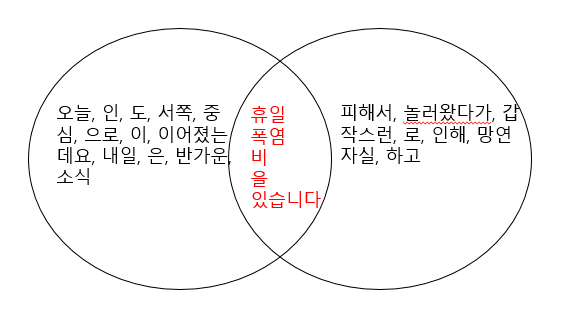

In [153]:
from IPython.display import Image
Image('111.PNG')

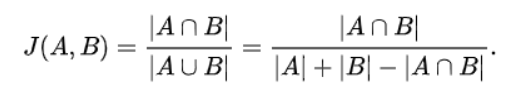

In [152]:
Image('222.png')

예제1. 다음 A집합과 B집합의 자카드 유사도를 구하시오!
```
A = {1,2,3}
B = {2,3,4}
J(A,B) = 'A 교 B' = {2,3}
'A 합 B' = {1,2,3,4}
J(A,B) = 2/4 = 0.5
```

예제2. FRANCE, FRENCH가 주어졌을 때 자카드 유사도는?

In [ ]:
A = {FR,RA,AN,NC,CE}
B = {FR,RE,EN.NC,CH}
J(A,B) = ?

A교B = {FR,NC}
A합B = {FR,RA,AN,NC,CE,RE,EN,CH}
J(A,B) = 2/8

# 파이썬으로 합집합과 교집합 구현하기  


In [179]:
a = {1,2,3,4}
b = {2,4,5}
print(type(a)) # 집합 자료구조 set

<class 'set'>


1. a와 b의 합집합 구하기

In [166]:
result1 = a.union(b) # 합집합
print(result1)

{1, 2, 3, 4, 5}


2. a와 b의 교집합 구하기

In [182]:
result2 = a.intersection(b)
print( result2 )

{2, 4}


In [180]:
print(a&b) # 교집합, a와 b를 둘 중 전부를(and)충족 
print(a|b) # 합집합, a혹은 b 둘 중 하나만(or) 충족

{2, 4}
{1, 2, 3, 4, 5}


3. a와 b의 자카드 유사도 구하기

In [170]:
len(a&b)/len(a|b)

0.4

# 리스트로 합집합과 교집합 구하기

In [172]:
a = [1,2,3,4]
b = [2,4,5]

1. a와 b의 합집합 구하기

In [173]:
result1 = set(a+b)
print(result1)

{1, 2, 3, 4, 5}


2. a와 b의 교집합 구하기( 얘는 없다.)

In [177]:
result2 = []
for i in a:
    if i in b:
        result2.append(i)
result2

[2, 4]

# 자카드 유사도 알고리즘 문제를 파이썬으로 구현하는 방법 순서  

1. 문제를 2번 읽으면서 문제를 정확하게 파악한다.(특히 질문을 명확하게 제시해줘야 합니다.)  
   
질문: FRANCE, FRENCH의 두 단어의 자카드 유사도는?  
관련 알고리즘(자카드 유사도)의 정확한 이해가 있어야 합니다.  

2. 문제를 해결하기 위해서 순서별로 해결방법을 기술한다.  
    2.1 두 문장을 받아서 두개의 철자로 분리하여 리스트에 저장한다.(영문자로 된 글자 쌍만 유효하고)  
    2.2 a와 b 두개의 합집합을 구함  
    2.3 a와 b 두개의 교집합을 구함
    2.4 a와 b의 자카드 유사도를 구합니다.(결과에 65536곱)
    2.5 a와 b가 모두 공집합일 경우에는 J(A,B) = 1로 정의
3. 순서별로 정한 해결방법을 파이썬 코드로 구현한다.(한글 --> 파이썬)

In [256]:
# 2.1 두 문장을 받자
str1 = input('문자열을 입력하세요').upper()
str2 = input('문자열을 입력하세요').upper()

def str_split(string):
    string = string.upper()
    res = []
    for i in range(len(string)-1):
        if string[i].isalpha() and string[i+1].isalpha(): # 문자라면,
            res.append(string[i:i+2])
    return res
print(str_split(str1))
print(str_split(str2))

문자열을 입력하세요france
문자열을 입력하세요frfran
['FR', 'RA', 'AN', 'NC', 'CE']
['FR', 'RF', 'FR', 'RA', 'AN']


2.2 교집합을 구하자


In [238]:
str1 = 'France'
str2 = 'french'
a = set(str_split(str1)) # set으로 set class를 만들어준다. 그런데 얘는 중복은 날려버린다. 그래서 안된다. 
b = set(str_split(str2)) # french 대신에 frfran를 해보면 알 수 있다.
a&b

{'FR', 'NC'}

In [235]:
a|b

{'AN', 'CE', 'CH', 'EN', 'FR', 'NC', 'RA', 'RE'}

In [236]:
len(a&b)/len(a|b)# 중복은 날려버린다. 그래서 안된다. 

0.25

다시 교집합을 구하자

In [306]:
intersection = []
for i in str_split(str1):
    if i in str_split(str2):
        intersection.append(i)
intersection

['FR', 'RA', 'AN', 'NC', 'CE']  
['FR', 'RF', 'FR', 'RA', 'AN']

2.3 합집합을 구하자

In [261]:
union = str_split(str1) + str_split(str2)
print(union)
for i in intersection:
    if i in union:
        del union[union.index(i)]
print(union)

['FR', 'RA', 'AN', 'NC', 'CE', 'FR', 'RF', 'FR', 'RA', 'AN']
['NC', 'CE', 'FR', 'RF', 'FR', 'RA', 'AN']


자카드 유사도를 구하자

In [265]:
len(intersection)/len(union) * 65536

28086.85714285714

In [332]:
#str1 = input('문자열을 입력하세요').upper()
#str2 = input('문자열을 입력하세요').upper()
import math
def str_split(string):
    string = string.upper()
    res = []
    for i in range(len(string)-1):
        if string[i].isalpha() and string[i+1].isalpha(): # 문자라면,
            res.append(string[i:i+2])
    return res
def Jaccard(str1,str2):
    intersection = []
    result = collections.Counter(str_split(str1))&collections.Counter(str_split(str2))
    intersection = list(result.elements())
#    intersection = []
#    for i in str_split(str1):
#        if i in str_split(str2):
#            intersection.append(i)
#    intersection

    union = str_split(str1) + str_split(str2)
    for i in intersection:
        del union[union.index(i)]

    if len(union) != 0:
        return math.trunc(len(intersection)/len(union) * 65536)
    else:
        return 65536


In [333]:
print(Jaccard('FRANCE','french'))
print(Jaccard('handshake','shake hands'))
print(Jaccard('aa1+aa2','AAAA12'))
print(Jaccard('E=M*C^2','e=m*c^2'))

16384
65536
43690
65536


a와 b가 공집합일 경우에는 1로 만든다.

In [ ]:
len_u = len(union)
print(math.trunc(len_i/len_u))

문제521. 지금까지의 코드를 함수로 만들어서 아래와 같이 실행되게 하시오.
```
print(Jaccard(str1,str2))
문자열을 입력해주세요. : FRANCE
문자열을 입력해주세요. : french

16384
```

문제522. 지금까지 만든 Jaccard 함수에는 공집합이 없으니까 1로 만들것 (위에 적용됨) 

In [264]:
a = [2,2,3,1]
b = [1,2,2,4,5]
a_b_inter = [i for i in a if i in b]
a_b_union = list(set(a+b))

print(a_b_inter)
a_b_union

[2, 2, 1]


[1, 2, 3, 4, 5]

In [364]:
import collections
a = [1,1,1,2,2,3]
b = [1,1,2,2,4,5]

intersection = []
result = collections.Counter(a) & collections.Counter(b) # 교집합
intersection = list(result.elements()) # 요소만 리스트로 빼내오기

result2 = collections.Counter(a) | collections.Counter(b) # 합집합
union = list(result2.elements())       # 요소만 리스트로 빼내오기

print(intersection)
print(union)

[1, 1, 2, 2]
[1, 1, 1, 2, 2, 3, 4, 5]


문제523. set을 사용하지 말고 아래의 a와 b로 합집합
```
a = [1,1,1,2,2,3]
b = [1,1,2,2,4,5]
```

완성본

In [359]:
import math
import collections    # intersection 용

def str_split(string):
    string = string.upper()
    res = []

    for i in range(len(string)-1):
        if string[i].isalpha() and string[i+1].isalpha(): # 문자라면,
            res.append(string[i:i+2])
    return res

def Jaccard(str1,str2):

    # intersection 수정했습니다.
    intersection = []
    result = collections.Counter(str_split(str1)) & collections.Counter(str_split(str2))
    intersection = list(result.elements())       # 교집합 &

    # union 합집합 수정했습니다.
    result2 = collections.Counter(str_split(str1)) | collections.Counter(str_split(str2))
    union = list(result2.elements())             # 합집합 |

    if len(union) != 0:
        return math.trunc(len(intersection)/len(union) * 65536)
    else:
        return 65536

print(Jaccard('FRANCE','french'))
print(Jaccard('handshake','shake hands'))
print(Jaccard('aa1+aa2','AAAA12'))
print(Jaccard('E=M*C^2','e=m*c^2'))

16384
65536
43690
65536


문제524. (오늘의 마지막 문제) collections를 이용해서 자카드 유사도를 구현하세요.

In [367]:
import math
import collections    # intersection 용

def str_split(string):
    string = string.upper()
    res = []

    for i in range(len(string)-1):
        if string[i].isalpha() and string[i+1].isalpha(): # 문자라면,
            res.append(string[i:i+2])
    return res

def Jaccard(str1,str2):
    a = str_split(str1)
    b = str_split(str2)

    # intersection 수정했습니다.
    intersection = []
    result = collections.Counter(a) & collections.Counter(b)
    intersection = list(result.elements())       # 교집합 &

    # union 합집합 수정했습니다.
    union = []
    result2 = collections.Counter(a) | collections.Counter(b)
    union = list(result2.elements())             # 합집합 |

    if len(union) != 0:
        return math.trunc(len(intersection)/len(union) * 65536)
    else:
        return 65536

print(Jaccard('FRANCE','french'))
print(Jaccard('handshake','shake hands'))
print(Jaccard('aa1+aa2','AAAA12'))
print(Jaccard('E=M*C^2','e=m*c^2'))

16384
65536
43690
65536
